# Data preparation Notebook
This notebook is used to prepare, clean and preprocess the data for the ML model training.</br>
This notebook provides insights into the data through visualizations and statistical analysis.

In [1]:
# import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the neccecary files the train and test data

train_raw = pd.read_csv('Source Data/train - train.csv')
test_raw = pd.read_csv('Source Data/test - test.csv')

## Dataset columns are as follows:<br/>
■ id - ID<br/>
■ battery_power - Total energy a battery can store in one time measured in mAh<br/>
■ blue - Has Bluetooth or not<br/>
■ clock_speed - The speed at which the microprocessor executes instructions<br/>
■ dual_sim - Has dual sim support or not<br/>
■ fc - Front Camera megapixels<br/>
■ four_g - Has 4G or not<br/>
■ int_memory - Internal Memory in Gigabytes<br/>
■ m_dep - Mobile Depth in cm<br/>
■ mobile_wt - Weight of mobile phone<br/>
■ n_cores - Number of cores of the processor<br/>
■ pc - Primary Camera megapixels<br/>
■ px_height - Pixel Resolution Height<br/>
■ px_width - Pixel Resolution Width<br/>
■ ram - Random Access Memory in Megabytes<br/>
■ sc_h - Screen Height of mobile in cm<br/>
■ sc_w - Screen Width of mobile in cm<br/>
■ talk_time - longest time that a single battery charge will last when you are<br/>
■ three_g - Has 3G or not<br/>
■ touch_screen - Has touch screen or not<br/>
■ wifi - Has wifi or not<br/>
■ price_range - This is the target variable with the value of:<br/>
● 0 (low cost)<br/>
● 1 (medium cost)<br/>
● 2 (high cost)<br/>
● 3 (very high cost)<br/>

## Discover the data   

In [3]:
# print the columns of the train and test data
print(train_raw.columns)
print(test_raw.columns)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [4]:
# print the first 5 rows of the train and test data
train_raw.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [5]:
# the data shapes
print("The train dataset shape is :",train_raw.shape)
print("The test dataset shape is :",test_raw.shape)

The train dataset shape is : (2000, 21)
The test dataset shape is : (1000, 21)


In [6]:
# the traing data info
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
#the null values in the train data
train_raw.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## The data is :
- All numerical
- There are missing values</br>

*We have to study the data before we can start the preprocessing*

## Study the characteristics of the datasets

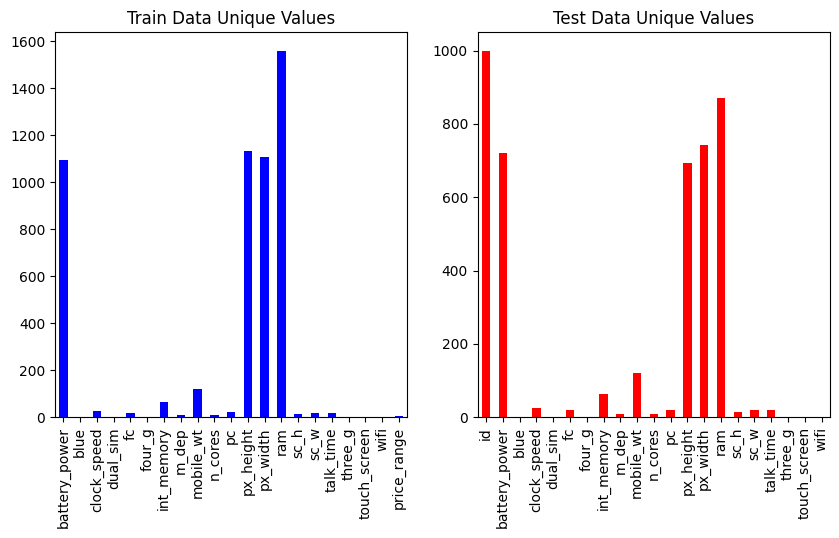

In [8]:
# the features that contains high unique values are continous features 
# plot the unique values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_raw.nunique().plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Train Data Unique Values')
plt.subplot(1, 2, 2)
test_raw.nunique().plot(kind='bar', figsize=(10, 5), color='red')
plt.title('Test Data Unique Values')
plt.show()


### The provided chart shows the number of the unique values in each feature column in the dataset.
- The greater the number of unique values, the more the feature is likely to be continuous.
- The smaller the number of unique values, the more the feature is likely to be categorical.

### The continuous features are:
- [battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, sc_h, sc_w, talk_time]

### The categorical features are:
- [blue, dual_sim, four_g, n_cores, three_g, touch_screen, wifi]

### The target variable is:
- price_range.</br>
The given problem is a *Catigorical problem*


### Set the numerical and categorical features

In [9]:
# set the numerical and categorical columns

numerical_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
categorical_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

### Investigate the balance of the target variable

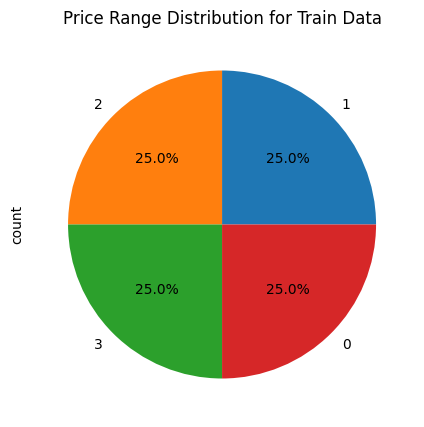

In [10]:
# The following is a pie chart of the target variable
# to examine the distribution of the target variable

plt.figure(figsize=(10, 5))
train_raw['price_range'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Price Range Distribution for Train Data')
plt.show()  

### The target variable is balanced 
- The number of samples in each class is almost equal
- The balanced target variable is good for the model training and evaluation process
- Macro-averaging is a good choice for the evaluation in this case.


### Investigate categorical features


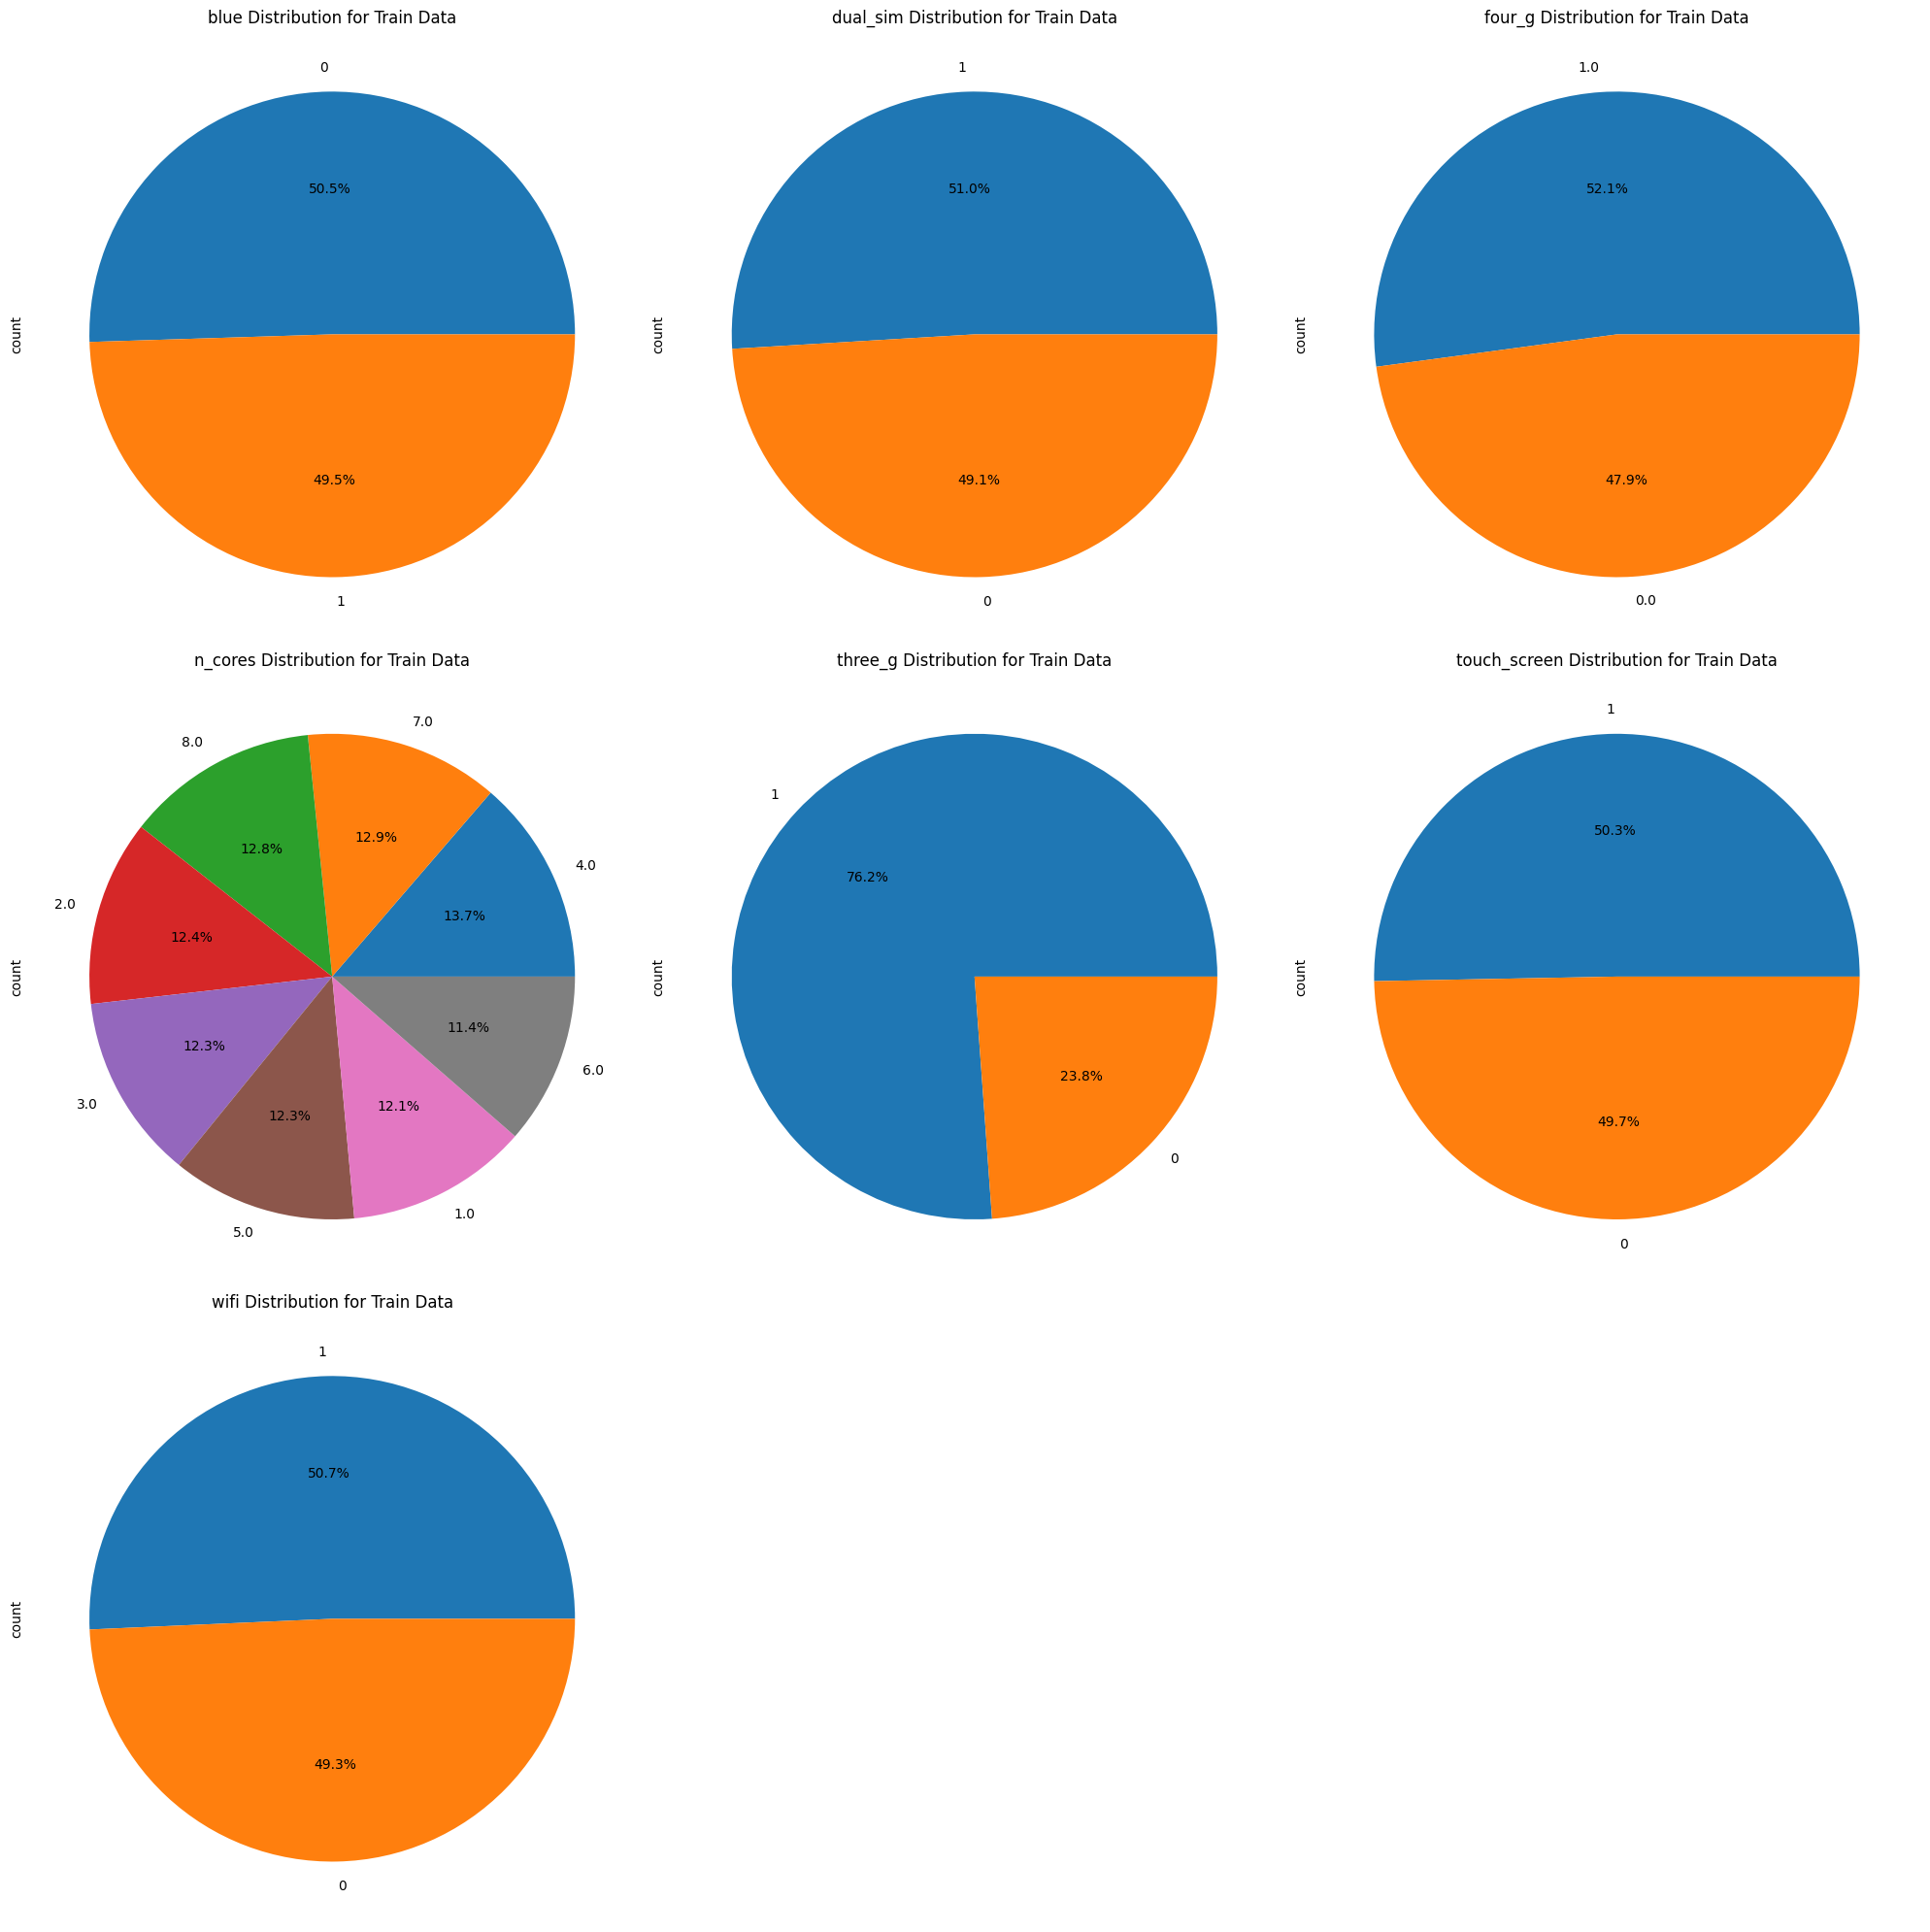

In [11]:
# pie chart for all the categorical columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    train_raw[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'{col} Distribution for Train Data')
    plt.tight_layout()


### The categorical features are almost balanced
- The number of samples in each class is almost equal, except for the three_g feature which has a slight imbalance, the four_g is almost balanced we have to check the correlation between (4G and 3G) features before exclude this feature.
- The balanced categorical features are good for the model training.

## Investigate the numerical features


In [12]:
# find the train numerical data, but with out the target variable.
# find the test numerical data, but without the id column 

train_num = train_raw[numerical_columns]
test_num = test_raw[numerical_columns]

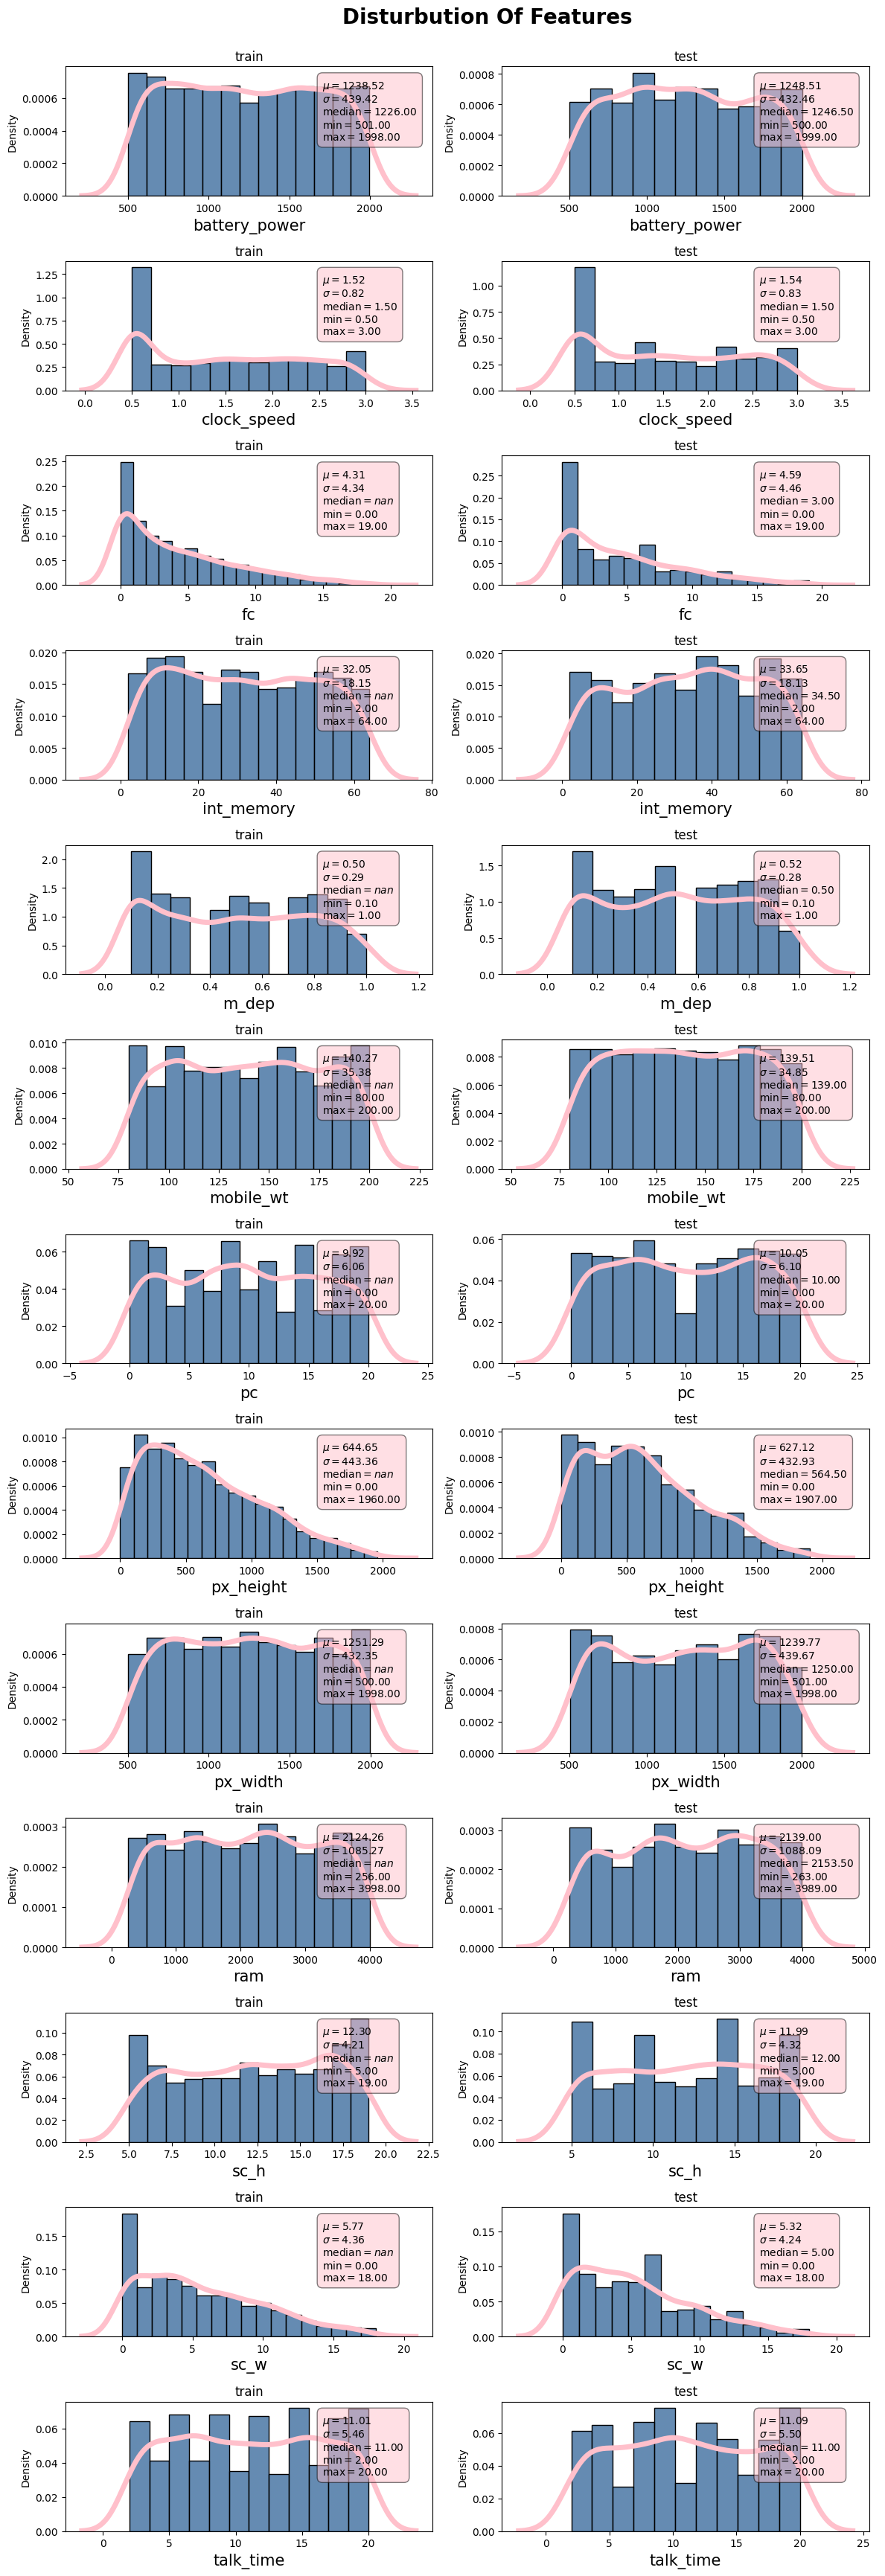

In [13]:


# draw histogram for the numerical column

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(train_num.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = train_num, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = train_num, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %train_num[col].mean(),
    r'$\sigma=%.2f$' %train_num[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(train_num[col]),
    r'$\mathrm{min}=%.2f$' %train_num[col].min(),
    r'$\mathrm{max}=%.2f$' %train_num[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = test_num, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = test_num, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %test_num[col].mean(),
    r'$\sigma=%.2f$' %test_num[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(test_num[col]),
    r'$\mathrm{min}=%.2f$' %test_num[col].min(),
    r'$\mathrm{max}=%.2f$' %test_num[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
   

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

### Investigate the distribution of the numerical features shows that:  
- The numerical features for the test and train are almost from the same distribution.
- The numerical features are not normally distributed.
- The numerical features have different scales.
- Some faeture are right skewed; like (px_height,sc_w)

### The features:
- px_height, sc_w, m_dep have values that are close to zero, which may cause problems in the model training process.


## Investigate the correlation between the features

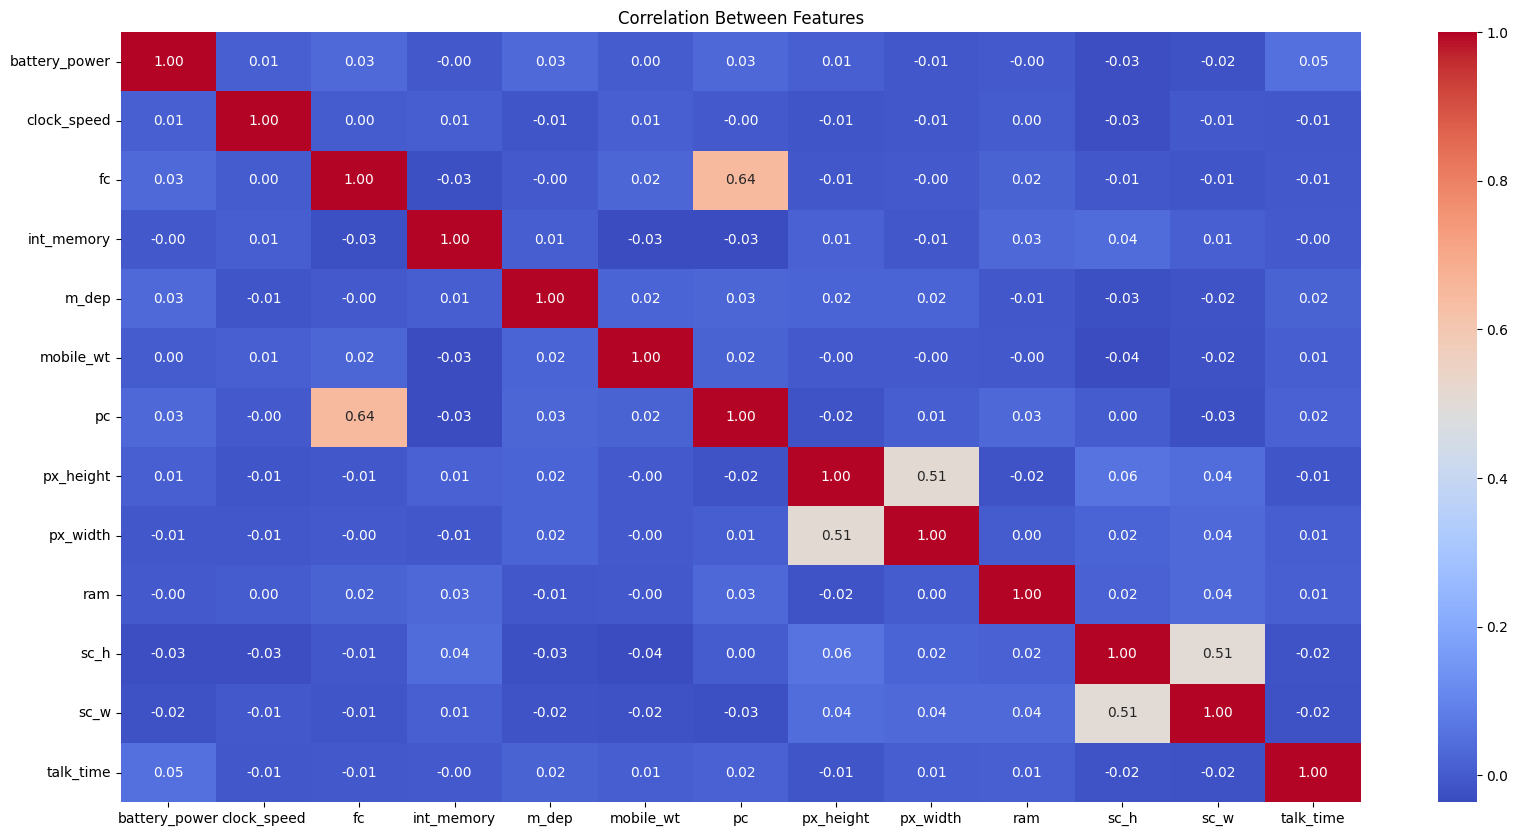

In [14]:
# the correlation between the numerical features
plt.figure(figsize=(20, 10))
sns.heatmap(train_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()


### The correlation matrix shows that:
- The features are not highly correlated.
- We have to avoid multicollinearity in the model training process.
- Some feature have a high correlation with other faetures like:</br>(px_height, px_width), (sc_h, sc_w) and (pc, fc)


### The correlation between the features and the target variable

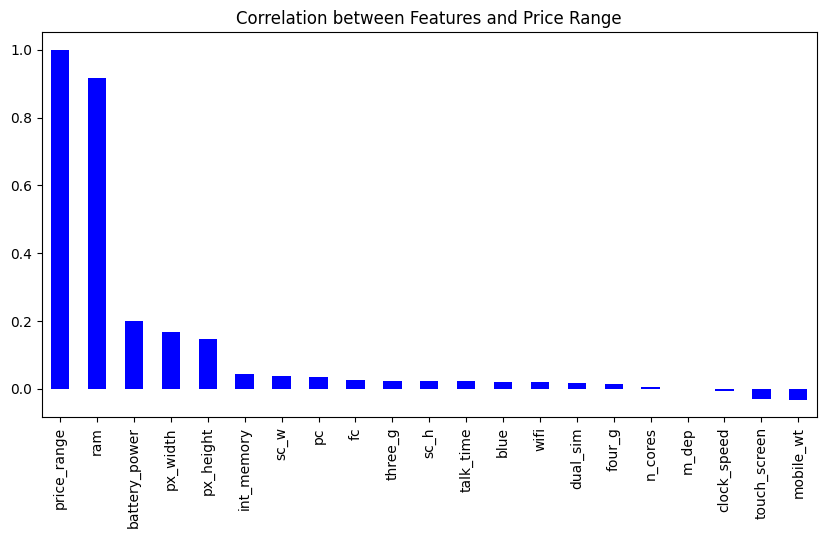

In [15]:
# the correlation between the numerical features and the target variable
plt.figure(figsize=(10, 5))
correlation = train_raw.corr()['price_range'].sort_values(ascending=False)
correlation.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Correlation between Features and Price Range')
plt.show()

### The correlation between the features and the target variable shows that:
- The features have a different correlation with the target variable.
- The most correlated features with the target variable are: ram, battery_power, px_width, px_height, and sc_w and the correlation is positive means that the price_range increases with the increase of these features.
- Some features have a negative correlation with the target variable like: mobile_wt.
- Some feature have almost no correlation with the target variable like:
n_cores, m_dep, clock_speed.
- Some features have misleading colleration feature like: touch_screen, it is likely to have positive correlation between it and the price, but here it is negative!


## Investigate the outliers in the features

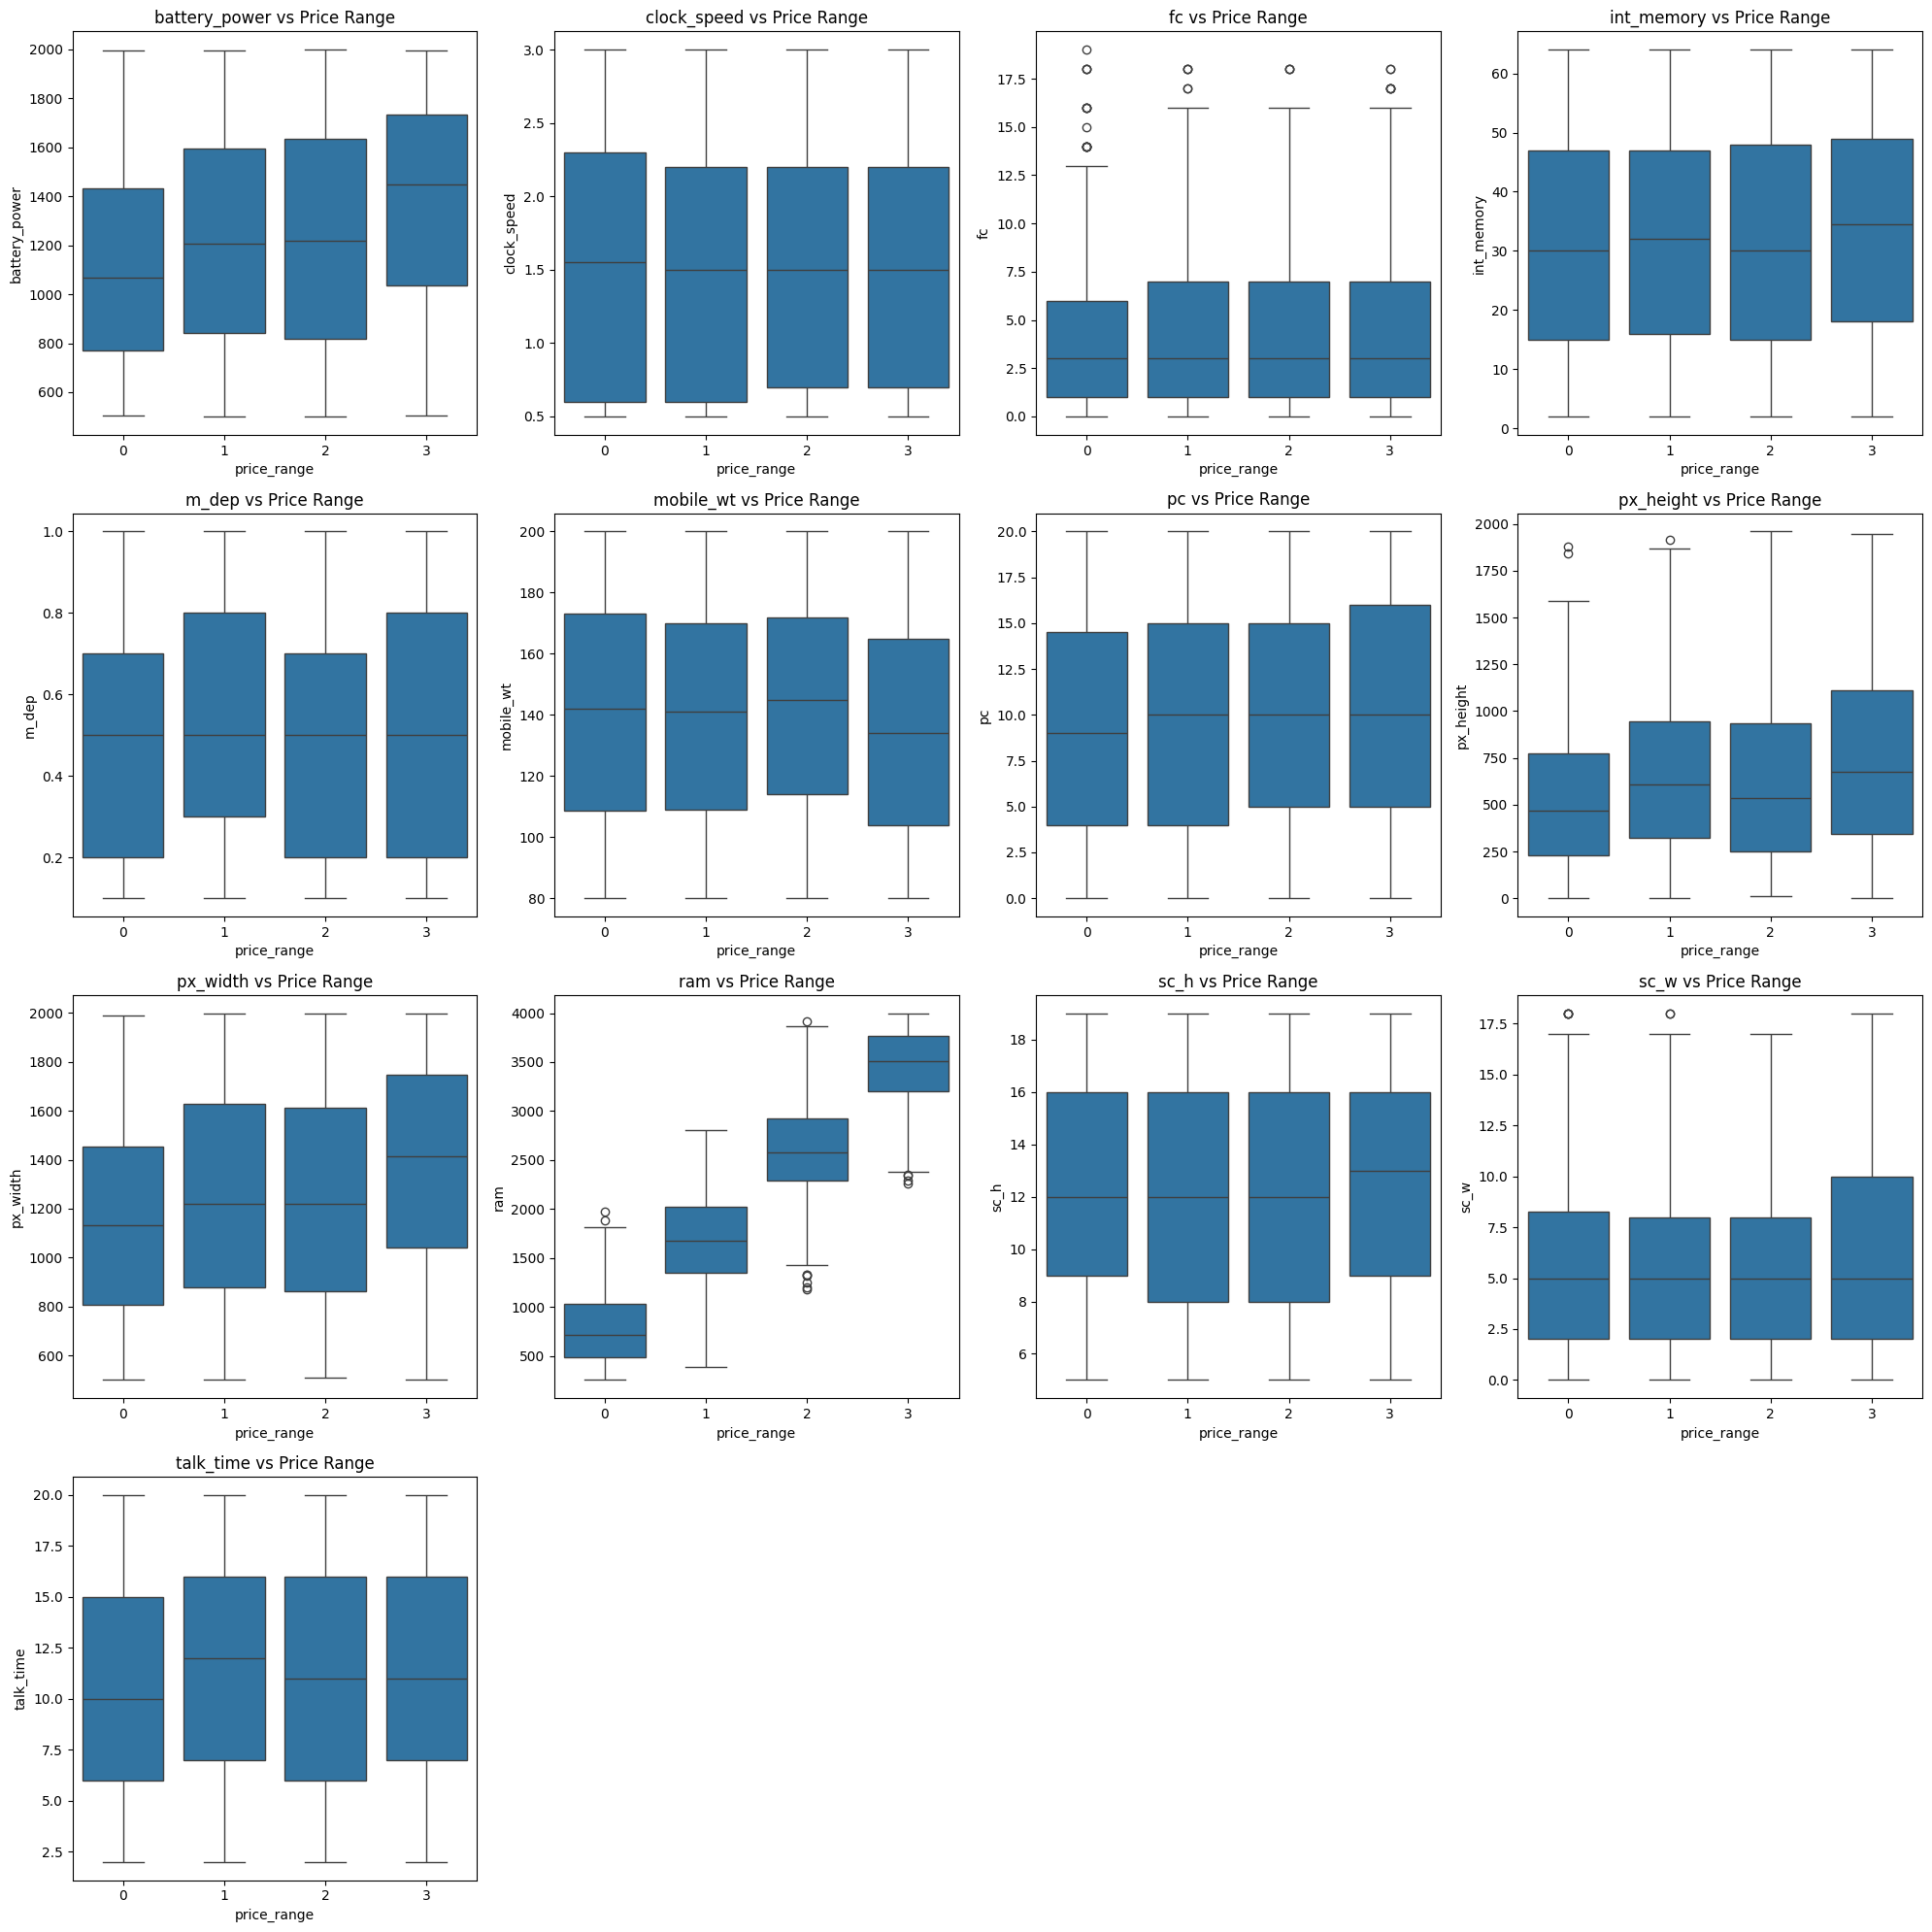

In [16]:
# Plot the numerical columns vs the price range

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='price_range', y=col, data=train_raw)
    plt.title(f'{col} vs Price Range')
plt.tight_layout()
plt.show()


### The previous boxplots show:
- some features have outliers like:
fc, ram, sc_w and px_height, some parctices like log transformation may help in this case.


## Cleaning the test dataset

In [23]:
# copy the train data    

train_data = train_raw.copy()

In [17]:
train_raw.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Length: 2000, dtype: int64

In [18]:
# rows that contain more than 2 nulls 
train_raw[train_raw.isnull().sum(axis=1) >= 2]

# there are 8 devices with 2 or more nulls

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


In [19]:
print("The total number or rows of 1  or more nulls is ",sum(train_raw.isnull().sum(axis=1) >= 1))


The total number or rows of 1  or more nulls is  9


In [20]:
# find the nulls only
train_raw.isnull().sum().apply(lambda x:  x if x>0 else None).dropna()

fc            5.0
four_g        5.0
int_memory    5.0
m_dep         5.0
mobile_wt     4.0
n_cores       4.0
pc            5.0
px_height     4.0
px_width      2.0
ram           2.0
sc_h          1.0
sc_w          1.0
dtype: float64

In [24]:
# find the rows that contain nulls in the fc and pc columns

train_data.loc[train_data["fc"].isnull() | train_data["pc"].isnull() , ["fc", "pc"]]

,fc,pc
157,NaN,NaN
158,NaN,NaN
261,NaN,NaN
276,NaN,13.0
292,6.0,NaN
293,6.0,NaN
371,NaN,18.0


In [25]:
# drop the rows of fc and pc both at the same time null values
train_data = train_data.dropna(subset=["fc", "pc"], how='all')

# impute the null values with the mean of the column
train_data["fc"].fillna(train_data["fc"].mean(), inplace=True)
train_data["pc"].fillna(train_data["pc"].mean(), inplace=True)

In [26]:
# find the rows that contain nulls in the 4g and 3g columns

train_data.loc[train_data["four_g"].isnull() | train_data["three_g"].isnull() , ["four_g", "three_g"]]

,four_g,three_g
276,NaN,1
371,NaN,1


In [27]:
# impute the null values with the mode of the column
train_data["four_g"].fillna(train_data["four_g"].mode()[0], inplace=True)

In [30]:
# drop any raws with hight and width null values
train_data = train_data.dropna(subset=["px_height", "px_width"], how='all')
train_data = train_data.dropna(subset=["sc_h", "sc_w"], how='all')

In [31]:
# find the nulls so far
train_data.isnull().sum().apply(lambda x:  x if x>0 else None).dropna()

int_memory    2.0
m_dep         2.0
mobile_wt     1.0
n_cores       1.0
px_height     2.0
dtype: float64

- For m_dep, mobile_wt, n_cores, talk_time, px_height are with smaller correlation to the price range.<br/>
- So we can impute them to the mean of the column.<br/>
- For the int_memory we can impute it as that may effect the price range significantly.<br/>

In [32]:
# drop int_memory column
train_data = train_data.drop('int_memory', axis=1)

# impute the null in the m_dep column with the mean
train_data["m_dep"].fillna(train_data["m_dep"].mean(), inplace=True)

# impute the null in the n_cores column with the mode
train_data["n_cores"].fillna(train_data["n_cores"].mode()[0], inplace=True)

#impute the null in the mobile_wt column with the mean
train_data["mobile_wt"].fillna(train_data["mobile_wt"].mean(), inplace=True)

# impute the null in the px_height column with the mean
train_data["px_height"].fillna(train_data["px_height"].mean(), inplace=True)


In [35]:
# check the nulls so far
train_data.isnull().sum().apply(lambda x:  x if x>0 else None).dropna()

# reset the index
train_data.reset_index(drop=True, inplace=True)


In [37]:
# save the cleaned data
train_data.to_csv('Source Data/train_cleaned.csv', index=False)

## Preprocessing the data

In [41]:
# according to "https://ineedlearn.wordpress.com/2020/12/26/width-height-and-dpr-of-cell-phones/"
# the screen lowest resolution is 240x320
# find the rows that contain px_height less than 240 
train_data.loc[(train_data["px_height"] < 200) , ["px_height", "px_width"]]


,px_height,px_width
0,20.0,756.0
11,151.0,1005.0
28,187.0,1311.0
32,85.0,1152.0
33,178.0,1919.0
...,...,...
1959,3.0,629.0
1961,190.0,657.0
1968,42.0,807.0
1975,173.0,1219.0


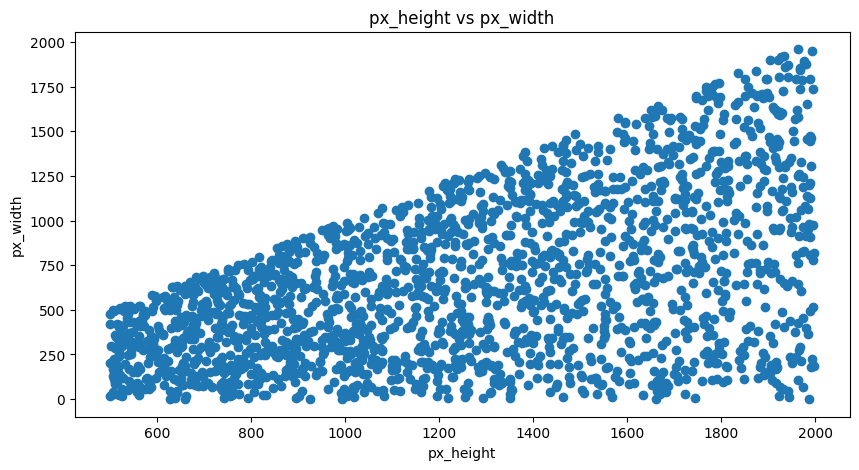

In [44]:
# plot the px_height and px_width
plt.figure(figsize=(10, 5))
plt.scatter(train_data["px_width"], train_data["px_height"])
plt.xlabel("px_height")
plt.ylabel("px_width")
plt.title("px_height vs px_width")
plt.show()


#### The above rows are not valid, so we will use linear regression model to predict the px_height values, please refer to the following notebook for more details:
ML_Model_to_predict_px_height.ipynb

In [42]:
# import the ML model

import pickle

# load the model
with open('ML Models/linear_regression_model.pkl', 'rb') as file:
    linear_regression_model = pickle.load(file)   

In [46]:
# for the rows that contain px_height less than 240, impute the px_height with the linear regression model
train_data.loc[(train_data["px_height"] < 200), "px_height"] = linear_regression_model.predict(train_data[train_data["px_height"] < 200]["px_width"].values.reshape(-1, 1))


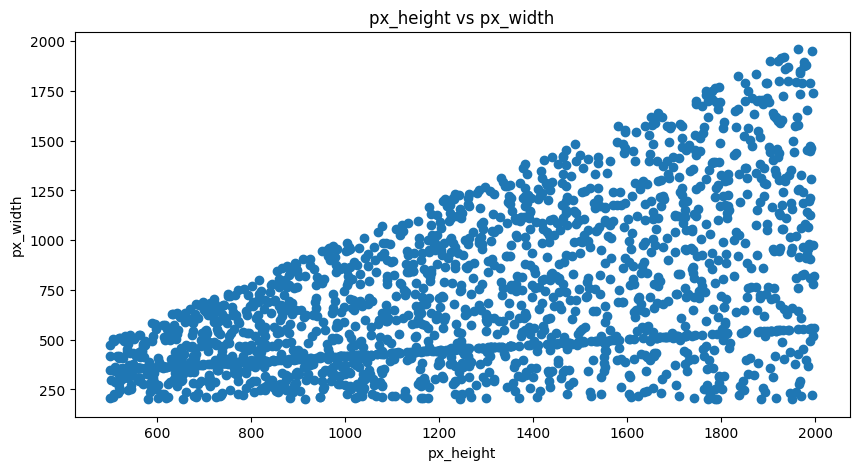

In [47]:

# plot the px_height and px_width
plt.figure(figsize=(10, 5))
plt.scatter(train_data["px_width"], train_data["px_height"])
plt.xlabel("px_height")
plt.ylabel("px_width")
plt.title("px_height vs px_width")
plt.show()


In [50]:
# examine the sc_h and sc_w columns
train_data.loc[(train_data["sc_w"] < 2), ["sc_h", "sc_w"]]

,sc_h,sc_w
5,17.0,1.0
8,17.0,1.0
12,18.0,0.0
13,7.0,1.0
19,11.0,1.0
...,...,...
1954,11.0,1.0
1961,10.0,1.0
1977,10.0,0.0
1978,14.0,1.0


In [51]:
# The sc_w is in a lowwer correlation with the price range
# so we can for the rows that contain sc_w less than 2, impute the sc_w with 2

train_data.loc[(train_data["sc_w"] < 2), "sc_w"] = 2


In [52]:
# save the cleaned data
train_data.to_csv('Source Data/train_cleaned.csv', index=False)